In [ ]:
# Use seaborn for pairplot
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import io


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.5.0


Upload data csv ke Google Colab dari local drive

In [ ]:
from google.colab import files
student_por = files.upload()

Saving student-por.csv to student-por (1).csv


Buat dataframe

In [ ]:
df_student_por = pd.read_csv(io.BytesIO(student_por['student-por.csv']))

In [ ]:
df_student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Ekspansi kolom yang bersifat text/string

In [ ]:
col_str = df_student_por.select_dtypes(include='object').columns.tolist()

encode = pd.get_dummies(df_student_por, columns=col_str, prefix=col_str)

encode

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


Pisahkan data train dan test (80/20)

In [ ]:
train_dataset = encode.sample(frac=0.8, random_state=0)
test_dataset = encode.drop(train_dataset.index)

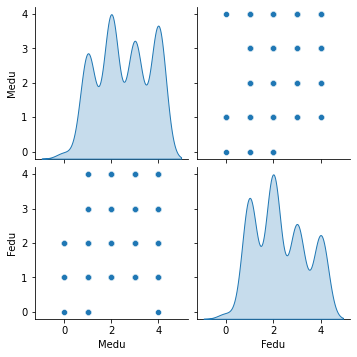

In [ ]:
sns.pairplot(train_dataset[['Medu', 'Fedu']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,519.0,16.789981,1.236594,15.0,16.0,17.0,18.0,22.0
Medu,519.0,2.527938,1.124786,0.0,2.0,2.0,4.0,4.0
Fedu,519.0,2.290944,1.091444,0.0,1.0,2.0,3.0,4.0
traveltime,519.0,1.587669,0.755624,1.0,1.0,1.0,2.0,4.0
studytime,519.0,1.938343,0.822027,1.0,1.0,2.0,2.0,4.0
failures,519.0,0.231214,0.602848,0.0,0.0,0.0,0.0,3.0
famrel,519.0,3.915222,0.986658,1.0,4.0,4.0,5.0,5.0
freetime,519.0,3.165703,1.052437,1.0,3.0,3.0,4.0,5.0
goout,519.0,3.173410,1.184189,1.0,2.0,3.0,4.0,5.0
Dalc,519.0,1.520231,0.964162,1.0,1.0,1.0,2.0,5.0


Separate the target value, the "label", from the features

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Dalc')
test_labels = test_features.pop('Dalc')

Normalization


In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
age,16.789981,1.236594
Medu,2.527938,1.124786
Fedu,2.290944,1.091444
traveltime,1.587669,0.755624
studytime,1.938343,0.822027
failures,0.231214,0.602848
famrel,3.915222,0.986658
freetime,3.165703,1.052437
goout,3.173410,1.184189
Dalc,1.520231,0.964162


In [ ]:
normalizer = preprocessing.Normalization()

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[16.79   2.528  2.291  1.588  1.938  0.231  3.915  3.166  3.173  2.272
  3.478  3.618 11.345 11.516 11.844  0.638  0.362  0.622  0.378  0.295
  0.705  0.709  0.291  0.131  0.869  0.216  0.077  0.393  0.208  0.106
  0.064  0.037  0.57   0.277  0.052  0.432  0.237  0.11   0.222  0.222
  0.713  0.066  0.902  0.098  0.387  0.613  0.94   0.06   0.543  0.457
  0.193  0.807  0.106  0.894  0.254  0.746  0.63   0.37 ]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[16  2  1  2  2  0  4  2  2  4  5  2  9  7  8  0  1  0  1  0  1  1  0  0
   1  0  1  0  0  0  0  0  0  1  0  0  0  1  0  0  1  0  1  0  1  0  1  0
   1  0  1  0  0  1  0  1  0  1]]

Normalized: [[-0.64 -0.47 -1.18  0.55  0.08 -0.38  0.09 -1.11 -0.99  1.32  1.05 -0.35
  -0.83 -1.49 -1.16 -1.33  1.33 -1.28  1.28 -0.65  0.65  0.64 -0.64 -0.39
   0.39 -0.52  3.46 -0.8  -0.51 -0.34 -0.26 -0.19 -1.15  1.61 -0.23 -0.87
  -0.56  2.85 -0.53 -0.53  0.63 -0.26  0.33 -0.33  1.26 -1.26  0.25 -0.25
   0.92 -0.92  2.05 -2.05 -0.34  0.34 -0.58  0.58 -1.31  1.31]]


# Linear regression

In [ ]:
# Linear regression

In [ ]:
walc = np.array(train_features['Walc'])

walc_normalizer = preprocessing.Normalization(input_shape=[1,])
walc_normalizer.adapt(walc)

In [ ]:
walc_model = tf.keras.Sequential([
    walc_normalizer,
    layers.Dense(units=1)
])

walc_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
walc_model.predict(walc[:10])

array([[-1.079],
       [-0.455],
       [-1.079],
       [ 0.17 ],
       [ 0.794],
       [ 0.794],
       [ 0.794],
       [-0.455],
       [-1.703],
       [-0.455]], dtype=float32)

In [ ]:
walc_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = walc_model.fit(
    train_features['Walc'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 3.53 s, sys: 192 ms, total: 3.72 s
Wall time: 3.39 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.456990,0.489591,95
96,0.455708,0.478005,96
97,0.455099,0.499283,97
98,0.453623,0.476473,98
99,0.452375,0.480957,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Dalc]')
  plt.legend()
  plt.grid(True)

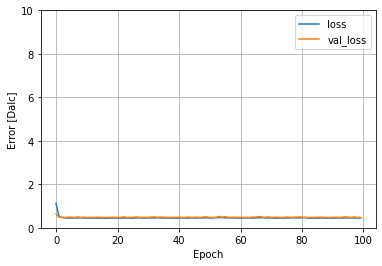

In [ ]:
plot_loss(history)


In [ ]:
test_results = {}

test_results['walc_model'] = walc_model.evaluate(
    test_features['Walc'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = walc_model.predict(x)

In [ ]:
def plot_walc(x, y):
  plt.scatter(train_features['Walc'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Walc')
  plt.ylabel('Dalc')
  plt.legend()

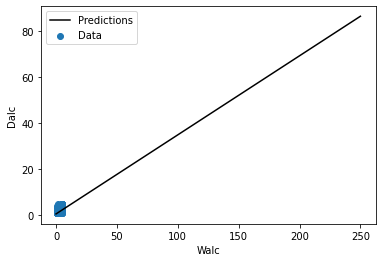

In [ ]:
plot_walc(x,y)

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

array([[ 1.039],
       [ 1.118],
       [ 0.242],
       [ 2.237],
       [ 2.48 ],
       [ 0.274],
       [-3.03 ],
       [-3.461],
       [-0.396],
       [-0.667]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(58, 1) dtype=float32, numpy=
array([[ 0.186],
       [-0.116],
       [ 0.037],
       [ 0.078],
       [ 0.285],
       [-0.054],
       [ 0.2  ],
       [-0.051],
       [-0.097],
       [-0.012],
       [-0.297],
       [-0.126],
       [-0.098],
       [-0.295],
       [-0.157],
       [-0.296],
       [ 0.13 ],
       [-0.269],
       [ 0.287],
       [-0.09 ],
       [ 0.066],
       [-0.292],
       [-0.308],
       [ 0.141],
       [ 0.127],
       [-0.12 ],
       [ 0.127],
       [-0.093],
       [-0.067],
       [-0.011],
       [ 0.251],
       [-0.303],
       [ 0.065],
       [ 0.315],
       [-0.117],
       [-0.286],
       [ 0.012],
       [-0.292],
       [-0.235],
       [ 0.099],
       [-0.148],
       [ 0.317],
       [ 0.166],
       [ 0.282],
       [-0.303],
       [ 0.141],
       [ 0.088],
       [ 0.114],
       [-0.032],
       [-0.07 ],
       [-0.252],
       [ 0.254],
       [ 0.13 ],
       [ 0.136],
       [-0.11 

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 3.63 s, sys: 192 ms, total: 3.82 s
Wall time: 3.5 s


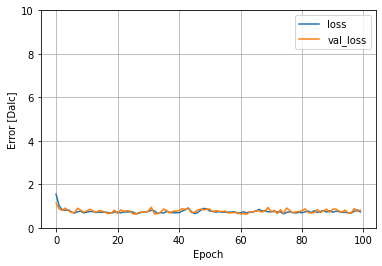

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# A DNN regression


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_walc_model = build_and_compile_model(walc_normalizer)

In [ ]:
dnn_walc_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_walc_model.fit(
    train_features['Walc'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.09 s, sys: 263 ms, total: 4.35 s
Wall time: 5.48 s


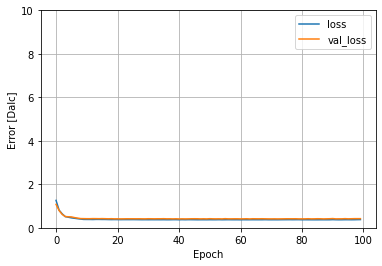

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_walc_model.predict(x)

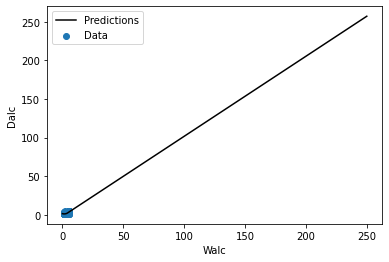

In [ ]:
plot_walc(x, y)


In [ ]:
test_results['dnn_walc_model'] = dnn_walc_model.evaluate(
    test_features['Walc'], test_labels,
    verbose=0)

Full model


In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 58)                117       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                3776      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 8,118
Trainable params: 8,001
Non-trainable params: 117
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.34 s, sys: 272 ms, total: 4.61 s
Wall time: 4.08 s


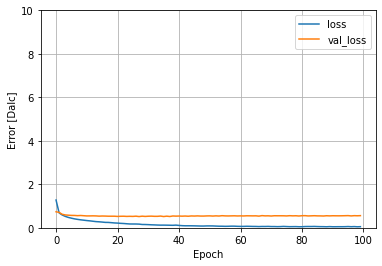

In [ ]:
plot_loss(history)


In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

Performance


In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Dalc]']).T

,Mean absolute error [Dalc]
walc_model,0.409583
linear_model,0.759436
dnn_walc_model,0.373625
dnn_model,0.574095


Make predictions


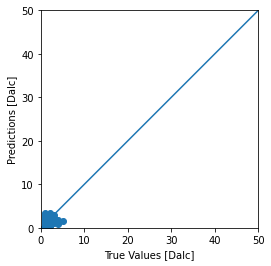

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Dalc]')
plt.ylabel('Predictions [Dalc]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

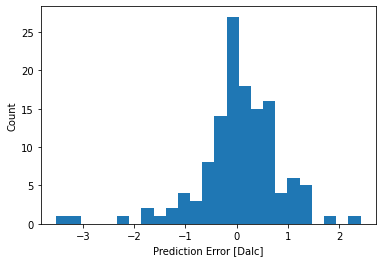

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Dalc]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Dalc]']).T

,Mean absolute error [Dalc]
walc_model,0.409583
linear_model,0.759436
dnn_walc_model,0.373625
dnn_model,0.574095
reloaded,0.574095
